In [405]:
%matplotlib inline
from astropy import constants as const
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import AutoMinorLocator,MultipleLocator,ScalarFormatter
from glob import glob
import numpy as np
import pandas as pd
from astropy.io import fits
import re

In [406]:
# Set up for plotting
bfsize=22
plt.rc('font',family='times')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['figure.figsize'] = (8,5.5)
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = bfsize
plt.rcParams['axes.labelpad'] = 1.0
plt.rcParams['axes.labelweight'] = 600 # 400 is normal, 700 is bold
plt.rcParams['xtick.major.width'] = 1.4
plt.rcParams['ytick.major.width'] = 1.4
plt.rcParams['xtick.major.size'] = 0.3*bfsize
plt.rcParams['ytick.major.size'] = 0.3*bfsize
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 0.19*bfsize
plt.rcParams['ytick.minor.size'] = 0.19*bfsize
plt.rcParams['xtick.labelsize'] = 1.0*bfsize
plt.rcParams['ytick.labelsize'] = 1.0*bfsize
plt.rcParams['xtick.major.pad'] = 0.155*bfsize
plt.rcParams['ytick.major.pad'] = 0.155*bfsize
plt.rcParams['xtick.minor.pad'] = 0.155*bfsize
plt.rcParams['ytick.minor.pad'] = 0.155*bfsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = 'True'
plt.rcParams['ytick.right'] = 'True'
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 1
plt.rcParams['legend.fancybox'] = 'True'
plt.rcParams['legend.fontsize'] = 1.1*bfsize
plt.rcParams['legend.labelspacing'] = 0.25
plt.rcParams['legend.handletextpad'] = 0.35
plt.rcParams['legend.borderpad'] = 0.45
plt.rcParams['legend.borderaxespad'] = 0.4
plt.rcParams['legend.columnspacing'] = 0.2
plt.rcParams['legend.frameon'] = 'False'
plt.rcParams['legend.edgecolor'] = 'black'

In [407]:
# My colours (should be better for colour-blind)
myc={'violet':'#6E36BB','blue':'#2480D0','cyan':'#00E6E6','green':'#44AB5E',
     'orange':'#FF6600','red':'#DD082C','black':'#000000','grey':'#d0d0d0',
     'dgrey':'#666666'}

# Solar parameters
Sun = {'Teff':5768, 'FeH':0.0, 'logg':4.43}

# Read in pair velocity separation data files

In [408]:
# Read in SP1 star names
sinfo = pd.read_csv('dv_results/SP1_Sample.csv',comment='#',
                    dtype={'RAJ2000':str, 'DecJ2000':str})
snames = list(sinfo['Object'])
# Remove HD1835 because it has much larger uncertainties than other stars
snames.remove('HD1835')

# Read in transition pair data
pairs = pd.read_csv('dv_results/transition_pairs.csv',comment='#',dtype={'lambda1':str,'lambda2':str})
pairs['name'] = pairs['ion1']+pairs['lambda1']+'_'+pairs['ion2']+pairs['lambda2']
pairs['dQ'] = pairs['q2']/pairs['omega2'] - pairs['q1']/pairs['omega1']
pairs['edQ'] = np.sqrt(np.square(pairs['dq2']/pairs['omega2']) + np.square(pairs['dq1']/pairs['omega1']))

# Make a big dataframe with all results by reading in pair results files
dflist = []
for i in range(0,len(pairs)):
    resdir = 'dv_results/'
    # Uncomment following line if testing sensitivity of procedure to large shifts in da/a
    #resdir = 'dv_results_+100ppb/'
    globstr = resdir + pairs['lambda1'][i]+pairs['ion1'][i].replace('II','2').replace('I','1') + '_' + \
                pairs['lambda2'][i]+pairs['ion2'][i].replace('II','2').replace('I','1') + \
                '_*_pair_separations_*.csv'
    for file in glob(globstr):
        df = pd.read_csv(file,comment='#')
        df['order'] = re.split('_|\.csv',file)[3]
        df['fibre_epoch'] = re.split('_|\.csv',file)[6]
        for key in pairs.keys():
            df['pair_'+key] = pairs[key][i]
        dflist.append(df)
df_all = pd.concat(dflist)

In [409]:
df_all

,star_name,Nobs,model_offset_pair,err_stat_pair,err_sys_pair,chisq_nu_pair,offset_transition1,t_stat_err1,t_sys_err1,chisq_nu1,...,pair_q1,pair_dq1,pair_lambda2,pair_omega2,pair_ion2,pair_q2,pair_dq2,pair_name,pair_dQ,pair_edQ
0,HD10180,22,1.267291,6.287901,6.479023,1.099475,10.837583,4.117012,8.958354,1.533108,...,490,60,4653.460,21489.386,CrI,490,60,CrI4652.593_CrI4653.460,0.000004,0.003948
1,HD102117,5,-8.862564,10.140743,6.479023,0.417515,10.203793,5.281174,8.958354,2.251516,...,490,60,4653.460,21489.386,CrI,490,60,CrI4652.593_CrI4653.460,0.000004,0.003948
2,HD102438,33,7.452343,3.287818,6.479023,0.607454,6.482582,1.967142,8.958354,1.344502,...,490,60,4653.460,21489.386,CrI,490,60,CrI4652.593_CrI4653.460,0.000004,0.003948
3,HD104982,1,-4.503860,24.342253,6.479023,NaN,18.918718,16.928302,8.958354,NaN,...,490,60,4653.460,21489.386,CrI,490,60,CrI4652.593_CrI4653.460,0.000004,0.003948
4,HD106116,8,-3.888819,7.958935,6.479023,0.404263,-4.102313,5.170261,8.958354,1.412900,...,490,60,4653.460,21489.386,CrI,490,60,CrI4652.593_CrI4653.460,0.000004,0.003948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,HD97037,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1300,900,6244.834,16013.236,VI,-600,60,FeI6242.372_VI6244.834,0.043682,0.056306
126,HD97343,7,0.325644,6.998342,0.000000,0.794634,0.685853,4.248483,2.044459,0.468531,...,-1300,900,6244.834,16013.236,VI,-600,60,FeI6242.372_VI6244.834,0.043682,0.056306
127,HD9782,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1300,900,6244.834,16013.236,VI,-600,60,FeI6242.372_VI6244.834,0.043682,0.056306
128,HD98281,7,-2.715989,7.927592,0.000000,0.574998,4.637185,4.374947,2.044459,0.663484,...,-1300,900,6244.834,16013.236,VI,-600,60,FeI6242.372_VI6244.834,0.043682,0.056306


# Weighted mean separation offset for each pair in each star

In [410]:
sp = {'sname':[], 'pname':[], 'Nobs':[], 'dv':[], 'edv_stat':[], 'edv_s2s':[], 'dQ':[], 'edQ':[]}
for sname in snames:
    for pname in pairs['name']:
        filt = (df_all['star_name'] == sname) & (df_all['pair_name'] == pname) &\
                pd.notna(df_all['model_offset_pair']) & pd.notna(df_all['err_stat_pair'])
        dv, edv_stat = df_all['model_offset_pair'][filt], df_all['err_stat_pair'][filt]
        if len(dv) > 0:
            sp['sname'].append(sname)
            sp['pname'].append(pname)
            sdv, swgt = np.average(dv,weights=1/np.square(edv_stat),returned=True)
            sp['dv'].append(sdv)
            sp['edv_stat'].append(1/np.sqrt(swgt))
            sp['edv_s2s'].append(df_all['err_sys_pair'][filt].values[0])
            sp['dQ'].append(df_all['pair_dQ'][filt].values[0])
            sp['edQ'].append(df_all['pair_edQ'][filt].values[0])
            Nobs = 0
            for epoch in ['pre', 'post']:
                filt_epoch = (filt) & (df_all['fibre_epoch'] == epoch)
                n = df_all['Nobs'][filt_epoch]
                Nobs += np.max(n) if len(n) > 0 else 0
            sp['Nobs'].append(Nobs)
df_sp = pd.DataFrame(sp)

In [412]:
df_sp

,sname,pname,Nobs,dv,edv_stat,edv_s2s,dQ,edQ
0,Vesta,CrI4652.593_CrI4653.460,21,-7.545484,5.037711,6.479023,0.000004,0.003948
1,Vesta,TiI4759.449_TiI4760.600,22,1.649409,8.188517,1.543938,0.000957,0.004039
2,Vesta,TiII4799.873_FeI4800.072,22,5.130570,9.683937,7.502358,-0.044160,0.019680
3,Vesta,NiI5138.510_FeI5143.171,21,-19.069924,4.933168,10.100014,-0.108290,0.029970
4,Vesta,TiII5187.346_FeI5200.158,19,-5.382431,5.900519,4.656412,-0.095639,0.047444
...,...,...,...,...,...,...,...,...
268,HD222582,NaI6162.452_CaI6168.150,1,-4.078758,34.471043,7.717793,-0.028621,0.001482
269,HD222582,NaI6162.452_FeI6175.044,1,-4.991391,33.325472,9.081186,0.027231,0.030875
270,HD222582,CaI6168.150_FeI6175.044,1,-0.635257,24.919685,5.887686,0.055851,0.030911
271,HD222582,NiI6192.900_FeI6202.028,1,54.843457,28.752817,12.321445,-0.162611,0.046063


# Weighted mean $\Delta\alpha/\alpha$ distribution for each star

In [413]:
s = {}
Nsim = 100000
for sname in snames:
    filt = df_sp['sname'] == sname
    v, ev_stat, ev_s2s = df_sp['dv'][filt], df_sp['edv_stat'][filt], df_sp['edv_s2s'][filt]
    Q, eQ = df_sp['dQ'][filt], df_sp['edQ'][filt]
    # Calculate number of observations of this star used to measure da/a
    s[sname] = {'Nobs':np.max(df_sp['Nobs'][filt])}
    # Calculate distribution using all error terms
    vtot = np.random.normal(v, np.sqrt(np.square(ev_stat)+np.square(ev_s2s)), size = (Nsim,len(v)))
    coeff = -2.0 * const.c.value * np.random.uniform(Q-eQ, Q+eQ, size = (Nsim,len(Q)))
    da = vtot / coeff
    eda = np.tile(np.sqrt(np.square(ev_stat) + np.square(ev_s2s)), (Nsim,1)) / np.abs(coeff)
    wmda = 1.e9 * np.average(da, axis=1, weights=1/np.square(eda))
    mwmda, swmda = np.mean(wmda), np.std(wmda)
    s[sname].update({'da':wmda, 'mda':mwmda, 'emda':swmda})
    # Calculate distribution without Q uncertainties
    coeff = -2.0 * const.c.value * np.tile(Q, (Nsim,1))
    da = vtot / coeff
    eda = np.tile(np.sqrt(np.square(ev_stat) + np.square(ev_s2s)), (Nsim,1)) / np.abs(coeff)
    wmda = 1.e9 * np.average(da, axis=1, weights=1/np.square(eda))
    mwmda, swmda = np.mean(wmda), np.std(wmda)
    s[sname].update({'da_stat+s2s':wmda, 'mda_stat+s2s':mwmda, 'emda_stat+s2s':swmda})
    # Calculate distribution without Q and s2s uncertainties
    vtot = np.random.normal(v, ev_stat, size = (Nsim,len(v)))
    da = vtot / coeff
    eda = np.tile(ev_stat, (Nsim,1)) / np.abs(coeff)
    wmda = 1.e9 * np.average(da, axis=1, weights=1/np.square(eda))
    mwmda, swmda = np.mean(wmda), np.std(wmda)
    s[sname].update({'da_stat':wmda, 'mda_stat':mwmda, 'emda_stat':swmda})
    # Calculate contributions from s2s and Q errors
    emda_Q, emda_s2s = 0.0, 0.0
    if s[sname]['emda_stat+s2s'] < s[sname]['emda']:
        emda_Q = np.sqrt(np.square(s[sname]['emda']) - np.square(s[sname]['emda_stat+s2s']))
    if s[sname]['emda_stat'] < s[sname]['emda_stat+s2s']:
        emda_s2s = np.sqrt(np.square(s[sname]['emda_stat+s2s']) - np.square(s[sname]['emda_stat']))
    s[sname].update({'emda_Q':emda_Q, 'emda_s2s':emda_s2s})
df_s = pd.DataFrame(s)

In [414]:
df_s

,Vesta,HD19467,HD20782,HD30495,HD45184,HD45289,HD76151,HD78429,HD78660,HD138573,HD140538,HD146233,HD157347,HD171665,HD183658,HD220507,HD222582
Nobs,22,7,14,2,106,12,7,51,1,1,11,138,19,3,4,10,1
da,"[-52.62708774480165, -51.70600047465362, -21.8...","[104.22289278463548, 126.27849709447494, -48.8...","[-32.57706591343655, -29.474921323107754, -3.7...","[-19.980265190128673, 45.125777845830584, -245...","[112.30122860508894, 73.31797721940399, 35.437...","[78.65294541423698, -32.73858040911914, 70.076...","[-164.41930708400182, -148.23602527879376, -14...","[-62.77944625977386, 41.164849083309186, 53.69...","[-12.007957332324136, -272.84958618832525, -21...","[131.75768047054618, 17.703248206596772, 335.2...","[57.84624282783638, 17.30948851572912, 28.1704...","[-8.465794754552501, 59.85744185597411, 23.581...","[18.180855820560893, 112.19539557237721, 33.80...","[-157.8978231374985, -191.6991119565656, -65.4...","[222.69820475924993, 142.3548981678021, 112.29...","[42.281053942822304, 96.23806542339882, 50.187...","[-13.370305188060978, 16.521811342510404, 134...."
mda,-15.4583,70.1867,-40.6134,-66.9806,25.3939,30.766,-138.517,10.7697,-223.781,156.599,-9.10592,35.1359,10.6411,-109.377,90.585,62.2048,84.9059
emda,45.0979,56.1197,44.8802,231.996,35.4965,43.9248,68.3779,34.9259,114.156,198.804,45.5632,30.8681,39.3453,69.1215,106.302,51.876,140.055
da_stat+s2s,"[-54.07950025212797, -52.61714313404486, -15.5...","[99.67495393361284, 104.13608720878804, -36.91...","[-43.693206129042224, -39.16762758623074, -9.4...","[-35.6153763785625, 94.37604112580792, -203.42...","[59.660046283184094, 89.53675315860148, 26.449...","[87.03071282937212, -41.706193229587214, 71.53...","[-153.61109417221067, -151.40655417131296, -15...","[-66.49854319944838, 37.73003279423357, 39.286...","[14.592327416452784, -308.0496024063603, -200....","[164.8677908155911, -0.8597871757057443, 326.8...","[50.60134951347359, 22.993925557830703, 28.651...","[0.5508703255903142, 74.86327718156768, 31.213...","[24.15781956686053, 97.5291774115199, 26.95064...","[-120.9960008063454, -157.4686750149774, -58.0...","[188.1034065247519, 191.5963384107871, 170.672...","[29.155166301378646, 107.53868782102128, 67.09...","[-12.036419696378221, 84.17457349316362, 23.04..."
mda_stat+s2s,-16.0434,71.9731,-42.1565,-64.418,25.9987,31.8668,-146.042,10.9893,-229.682,166.035,-9.57283,37.9845,11.2701,-112.504,94.355,63.9335,87.3866
emda_stat+s2s,45.2661,55.676,44.9799,226.799,32.5461,44.101,67.3479,35.1972,113.51,196.306,45.8368,30.8369,38.77,68.8448,104.924,50.6106,139.973
da_stat,"[-26.022182411898186, -41.2668426018126, -39.8...","[97.00415089564716, 105.42068953120025, 73.562...","[-44.4998771355775, -40.53678065218101, -8.457...","[-15.587903860840742, -399.34726581959575, -76...","[70.67038504721653, 65.11871794527217, 55.8187...","[30.268413693637747, -39.29116387258997, 19.59...","[-245.51364892768862, -136.62413632518965, -13...","[-2.4978763944686264, -20.561538208101336, -14...","[-342.5265341160253, -274.2544857655254, -198....","[238.75444791953757, -24.95161410442991, 123.8...","[-8.643357031924838, -35.3907572475515, -57.93...","[10.86590916458537, 8.18505818116857, 18.93438...","[42.82782593117972, 39.41647217281386, 42.6217...","[-185.02849835844998, -49.04075039160126, -184...","[40.03795620584052, 16.930304432655717, 131.11...","[48.434795671741185, 46.15518523337029, 21.717...","[-9.625558669214799, -25.38450755528286, 297.4..."
mda_stat,-32.9055,70.8431,-40.9105,-35.9912,61.046,30.7961,-162.881,-2.86132,-228.637,160.009,-44.8773,13.5183,36.5671,-96.8306,85.645,69.9027,95.5577
emda_stat,26.511,42.4037,30.4464,208.75,9.57428,25.2186,45.6076,15.1873,105.272,192.734,26.7205,7.60262,21.1062,56.5332,79.9561,36.9538,134.68


In [417]:
df_s.columns.values

array(['Vesta', 'HD19467', 'HD20782', 'HD30495', 'HD45184', 'HD45289',
       'HD76151', 'HD78429', 'HD78660', 'HD138573', 'HD140538',
       'HD146233', 'HD157347', 'HD171665', 'HD183658', 'HD220507',
       'HD222582'], dtype=object)

In [418]:
np.median([df_s[star]['Nobs'] for star in df_s.columns.values])

10.0

In [419]:
np.sum([df_s[star]['Nobs'] for star in df_s.columns.values])

409

# Weighted mean separation offset for each transition pair

In [420]:
p = {}
for pname in pairs['name']:
    filt = df_sp['pname'] == pname
    v, ev_stat, ev_s2s = df_sp['dv'][filt], df_sp['edv_stat'][filt], df_sp['edv_s2s'][filt]
    # Calculate weighted mean using all statistical and star-to-star terms
    ev2 = np.square(ev_stat) + np.square(ev_s2s)
    wmv, swgt = np.average(v, weights=1/ev2, returned=True)
    ewmv = 1/np.sqrt(swgt)
    p[pname] = {'dv':wmv, 'edv':ewmv}
    # Calculate weighted mean using statistical error only
    ev2 = ev_stat
    wmv, swgt = np.average(v, weights=1/ev2, returned=True)
    ewmv = 1/np.sqrt(swgt)
    p[pname].update({'dv_stat':wmv, 'edv_stat':ewmv})
    # Calculate systematic error contribution to uncertainty
    p[pname].update({'dv_sys':np.sqrt(np.square(p[pname]['edv']) - np.square(p[pname]['edv_stat']))})
df_p = pd.DataFrame(p)

In [421]:
df_p

,CrI4652.593_CrI4653.460,TiI4759.449_TiI4760.600,TiII4799.873_FeI4800.072,NiI5138.510_FeI5143.171,TiII5187.346_FeI5200.158,CaI6123.910_FeI6138.313,CaI6123.910_FeI6139.390,FeI6138.313_FeI6139.390,FeI6153.320_NaI6155.928,FeI6153.320_NaI6162.452,FeI6153.320_CaI6168.150,NaI6155.928_NaI6162.452,NaI6162.452_CaI6168.150,NaI6162.452_FeI6175.044,CaI6168.150_FeI6175.044,NiI6192.900_FeI6202.028,FeI6242.372_VI6244.834
dv,-3.628479,1.330680,2.143705,-2.721359,-1.169557,-2.493911,-2.500520,2.445527,1.617319,0.371954,1.345336,-2.548349,1.831730,0.231689,-0.879853,-0.589270,-0.492952
edv,2.187418,1.433793,1.552664,3.288134,1.681386,2.678919,2.592461,1.185120,3.849314,3.368835,2.434902,2.430088,2.976080,3.233442,2.072069,3.070211,4.298761
dv_stat,-2.693201,1.722227,2.963250,-2.756311,-1.240287,-3.740197,-3.063351,2.005963,1.451998,-0.813837,0.462872,-3.369081,2.201523,0.884325,-0.766691,-1.400006,-0.768828
edv_stat,0.513818,0.629831,0.679939,0.557551,0.555873,0.590744,0.588927,0.611586,0.853239,0.710236,0.632713,0.866836,0.668613,0.659023,0.552993,0.594704,0.758445
dv_sys,2.126215,1.288051,1.395868,3.240519,1.586841,2.612973,2.524682,1.015122,3.753559,3.293116,2.351260,2.270225,2.900002,3.165571,1.996915,3.012063,4.231325


# Plots of $\Delta\alpha/\alpha$ distribution for selected star

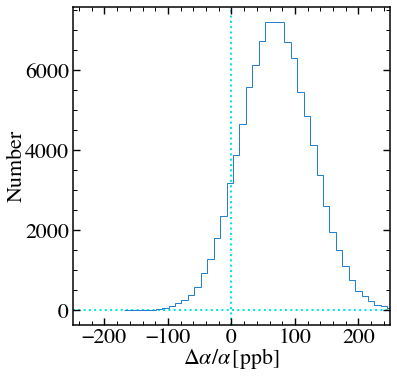

In [422]:
fig = plt.figure(figsize=(4.5,4.5))

#sname = 'Vesta'
sname = 'HD19467'

da = df_s[sname]['da']

xmin, xmax = -250.0, 250.0
xrng = xmax - xmin

ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)

N, _, __ = ax1.hist(da,bins=50,histtype='step',align='mid',color=myc['blue'],label=sname)
ymin, ymax = 0.0, np.max(N)
yrng = ymax - ymin
ymin, ymax = ymin - 0.05 * yrng, ymax + 0.05 * yrng
ax1.vlines([0.0],ymin,ymax,colors=myc['cyan'],linestyles=[':'],linewidths=2.0,zorder=1)
ax1.hlines([0.0],xmin,xmax,colors=myc['cyan'],linestyles=[':'],linewidths=2.0,zorder=1)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'$\Delta\alpha/\alpha\,$[ppb]',labelpad=-2,fontsize=bfsize)
ax1.set_ylabel(r'Number',labelpad=-2,fontsize=bfsize)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
#ax1.yaxis.set_major_locator(MultipleLocator(1))
#ax1.yaxis.set_minor_locator(AutoMinorLocator(0))

plt.minorticks_on()
fig.subplots_adjust(left=0.01,right=0.99,bottom=0.01,top=0.99,wspace=0.0,hspace=0.0)

# Export to PDF
#plt.savefig('da_SP1.pdf',bbox_inches='tight',pad_inches=0.02)

# Plot of $\Delta\alpha/\alpha$ for all stars

da/a = 7.09 +/- 4.84(stat) +/- 11.25(sys) (12.24 tot), chisqnu = 1.15 (18.36, 16)


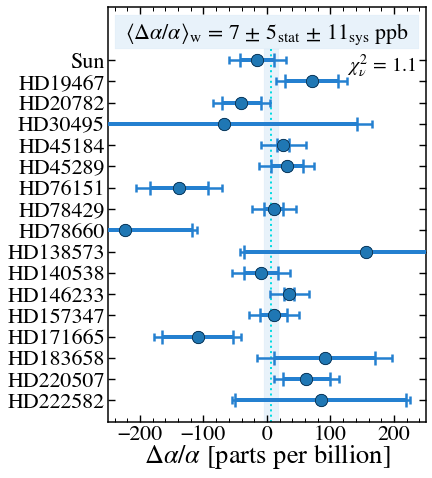

In [423]:
fig = plt.figure(figsize=(4.5,6.0))

x, ex, ex_stat = df_s.loc['mda'], df_s.loc['emda'], df_s.loc['emda_stat']
# Compute weighted mean over stars
wmx, swgt = np.average(x,weights=1/np.square(ex),returned=True)
ewmx = 1/np.sqrt(swgt)
_, swgt = np.average(x,weights=1/np.square(ex_stat),returned=True)
ewmx_stat = 1/np.sqrt(swgt)
ewmx_sys = np.sqrt(np.square(ewmx) - np.square(ewmx_stat))
# Compute chisq
chisq = np.sum(np.square(x-wmx)/np.square(ex))
chisqnu = chisq / (len(x) - 1.0)
print('da/a = {:.2f} +/- {:.2f}(stat) +/- {:.2f}(sys) ({:.2f} tot), chisqnu = {:.2f} ({:.2f}, {:d})'.format(
    wmx,ewmx_stat,ewmx_sys,ewmx,chisqnu,chisq,len(x)-1))

y = np.arange(len(snames),0,-1)
xmin, xmax = -250.0,250.0
xrng = xmax - xmin
ymin, ymax = 0, y[0] + 2.5
yrng = ymax - ymin

ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)

#plt.yticks(y,[re.sub('Vesta','Sun$\,$(Vesta)',sname) for sname in snames],rotation=0)
plt.yticks(y,[re.sub('Vesta','Sun',sname) for sname in snames])

ax1.vlines([wmx],ymin,ymax-2.0,colors=myc['cyan'],linestyles=[':'],linewidths=2.0,zorder=1)
ax1.fill_between([wmx-ewmx,wmx+ewmx],[ymax-2.0]*2,[ymin]*2,lw=0.2,facecolor=myc['blue'],
                 edgecolor=myc['blue'],alpha=0.10,zorder=1)
ax1.fill_between([xmin+0.02*xrng,xmax-0.02*xrng],[ymax-0.4]*2,[ymax-2.0]*2,lw=0.2,facecolor=myc['blue'],
                 edgecolor=myc['blue'],alpha=0.10,zorder=1)
ax1.errorbar(x,y,xerr=ex_stat,fmt='',ls='none',color=myc['blue'],alpha=1.0,elinewidth=4.0,
             capsize=7.0,mew=2.5,zorder=100)
ax1.errorbar(x,y,xerr=ex,fmt='',ls='none',color=myc['blue'],alpha=1.0,elinewidth=2.5,
             capsize=4.0,mew=2.5,zorder=100)
ax1.scatter(x,y,marker='o',s=150.0,c=myc['blue'],alpha=1.0,zorder=101)
ax1.scatter(x,y,marker='o',s=150.0,facecolors=None,edgecolors='black',linewidths=0.5,alpha=1.0,zorder=102)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'$\Delta\alpha/\alpha$ [parts per billion]',labelpad=-2,fontsize=1.2*bfsize)
annot = r'${:.0f}\,\pm\,{:.0f}_\mathrm{{stat}}\,\pm\,{:.0f}_\mathrm{{sys}}$ ppb'.format(wmx,ewmx_stat,ewmx_sys)
ax1.annotate(r'$\left<\Delta\alpha/\alpha\right>_\mathrm{w}\,=\,$'+annot,xy=(0.5,0.965),
             xycoords='axes fraction',ha='center',va='top',fontsize=1.0*bfsize)
ax1.annotate(r'$\chi^2_\nu\,=\,{:.1f}$'.format(chisqnu),xy=(0.97,0.89),
             xycoords='axes fraction',ha='right',va='top',fontsize=0.9*bfsize)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
#plt.minorticks_on()
fig.subplots_adjust(left=0.01,right=0.99,bottom=0.02,top=0.98,wspace=0.0,hspace=0.0)

# Export to PDF
#plt.savefig('da_stars.pdf',bbox_inches='tight',pad_inches=0.02)

# Simple table of result for each star

In [424]:
for i in range(0,len(sinfo)):
    sname = sinfo['Object'][i]
    if (sname != "HD1835"):
        ra, dec = '', ''
        if (sname != "Vesta"):
            ra, dec = sinfo['RAJ2000'][i], sinfo['DecJ2000'][i]
            ra = ra[0:2]+':'+ra[2:4]+':'+'{:05.2f}'.format(float(ra[4:]))
            dec = dec[0:3]+':'+dec[3:5]+':'+'{:04.1f}'.format(float(dec[5:]))
        print('{:8s} {:11s} {:11s} {:4d} {:5.2f} {:4.2f} {:6.1f} {:5.1f} {:5.1f}'
              .format(sname,ra,dec,sinfo['Teff'][i],sinfo['FeH'][i],sinfo['logg'][i],
                      df_s[sname]['mda'],df_s[sname]['emda_stat'],
                      np.sqrt(np.square(df_s[sname]['emda'])-
                              np.square(df_s[sname]['emda_stat']))))

Vesta                            5772  0.00 4.44  -15.5  26.5  36.5
HD19467  03:07:18.58 -13:45:42.4 5753 -0.07 4.30   70.2  42.4  36.8
HD20782  03:20:03.58 -28:51:14.7 5773 -0.09 4.39  -40.6  30.4  33.0
HD30495  04:47:36.29 -16:56:04.0 5857 -0.02 4.50  -67.0 208.7 101.2
HD45184  06:24:43.88 -28:46:48.4 5863  0.04 4.42   25.4   9.6  34.2
HD45289  06:24:24.35 -42:50:51.1 5710  0.03 4.25   30.8  25.2  36.0
HD76151  08:54:17.95 -05:26:04.0 5787  0.03 4.43 -138.5  45.6  50.9
HD78429  09:06:38.83 -43:29:31.1 5740  0.05 4.27   10.8  15.2  31.5
HD78660  09:09:53.86 +14:27:24.3 5788 -0.03 4.39 -223.8 105.3  44.2
HD138573 15:32:43.65 +10:58:05.9 5745 -0.04 4.41  156.6 192.7  48.8
HD140538 15:44:01.82 +02:30:54.6 5693  0.05 4.46   -9.1  26.7  36.9
HD146233 16:15:37.27 -08:22:10.0 5826  0.06 4.42   35.1   7.6  29.9
HD157347 17:22:51.29 -02:23:17.4 5730  0.03 4.42   10.6  21.1  33.2
HD171665 18:37:12.84 -25:40:16.6 5725 -0.10 4.46 -109.4  56.5  39.8
HD183658 19:30:52.72 -06:30:51.9 5824  0.06 4.46

# Plot showing shift test results

Change in weighted mean for shifted stars: 86.1 +/- 18.5
Error in mean of shifted values: 34.7
Change in weighted mean for unshifted stars: -0.8
Error in mean of unshifted values: 1.8
Vesta      85.9  25.2  39.5
HD19467     3.2  42.5  40.3
HD20782   104.3  25.6  38.3
HD30495     3.4 209.5 103.1
HD45184    93.3   8.8  43.7
HD45289    84.6  22.4  40.2
HD76151    88.1  27.1  43.1
HD78429   -10.2  15.2  34.7
HD78660    -2.4 105.0  49.8
HD138573 -174.0  87.7  41.1
HD140538   -0.8  26.8  39.8
HD146233   10.2   7.6  32.7
HD157347   -3.3  21.1  36.9
HD171665  163.9  54.5  44.2
HD183658    4.7  79.8  73.6
HD220507  149.4  32.0  44.6
HD222582   -2.1 133.7  45.1


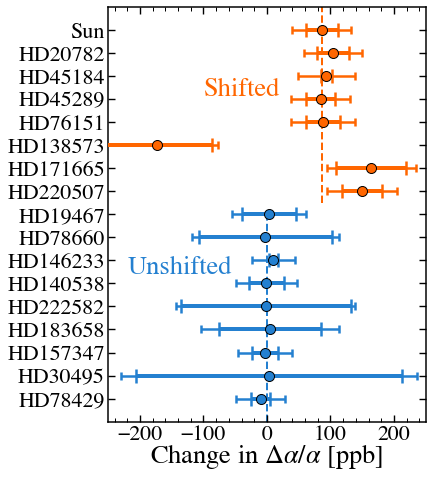

In [425]:
# For this plot to work you must have run all cells above, plus the one after
# this cell, after reading results from the dv_results_+100ppb directory, then re-run
# all cells above after reading actual, unshift results from dv_results directory.

fig = plt.figure(figsize=(4.5,6.0))

shifted = np.array(['Vesta','HD20782','HD45184','HD45289','HD76151','HD138573',
                    'HD171665','HD220507'])
not_shifted = list(set(snames).difference(shifted))

x, ex, ex_stat = df_s.loc['mda'], df_s.loc['emda'], df_s.loc['emda_stat']
# Note that sx, sex, sex_stat come from the next cell after reading
# dv_results_+100ppb directory.
dx = sx - x
edx = np.absolute(sex - ex)
offset = np.average(dx[not_shifted],weights=1/np.square(edx[not_shifted]))
dx -= offset

y = np.arange(len(snames),0,-1)
xmin, xmax = -250.0,250.0
xrng = xmax - xmin
ymin, ymax = 0, y[0] + 1.0
yrng = ymax - ymin

ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)

plt.yticks(y,[re.sub('Vesta','Sun',sname) for sname in list(shifted) + list(not_shifted)])

ax1.errorbar(dx[shifted],y[0:len(shifted)],xerr=sex_stat[shifted],fmt='',ls='none',
             color=myc['orange'],alpha=1.0,elinewidth=4.0,capsize=7.0,mew=2.5,zorder=100)
ax1.errorbar(dx[shifted],y[0:len(shifted)],xerr=sex[shifted],fmt='',ls='none',
             color=myc['orange'],alpha=1.0,elinewidth=2.5,capsize=4.0,mew=2.5,zorder=100)
ax1.scatter(dx[shifted],y[0:len(shifted)],marker='o',s=100.0,c=myc['orange'],
            edgecolors='black',alpha=1.0,zorder=101)
wm = np.average(sx[shifted],weights=1/np.square(sex[shifted])) -\
        np.average(x[shifted],weights=1/np.square(ex[shifted])) - offset
_, swgt = np.average(sx[shifted],weights=1/np.square(sex[shifted]),returned=True)
#_, swgt = np.average(x[shifted],weights=1/np.square(ex[shifted]),returned=True)
ewm = 1/np.sqrt(swgt)
ax1.vlines(wm,len(not_shifted)+0.5,ymax,colors=myc['orange'],linestyles=['--'],
           linewidths=2.0,zorder=1)
ax1.annotate('Shifted',xy=(0.30,0.80),xycoords='axes fraction',ha='left',
             va='center',color=myc['orange'],fontsize=1.2*bfsize)
print('Change in weighted mean for shifted stars: {:.1f} +/- {:.1f}'.format(wm,ewm))
print('Error in mean of shifted values: {:.1f}'
      .format(np.std(dx[shifted])/np.sqrt(len(shifted))))
ax1.errorbar(dx[not_shifted],y[len(shifted):],xerr=sex_stat[not_shifted],fmt='',ls='none',
             color=myc['blue'],alpha=1.0,elinewidth=4.0,capsize=7.0,mew=2.5,zorder=100)
ax1.errorbar(dx[not_shifted],y[len(shifted):],xerr=sex[not_shifted],fmt='',ls='none',
             color=myc['blue'],alpha=1.0,elinewidth=2.5,capsize=4.0,mew=2.5,zorder=100)
ax1.scatter(dx[not_shifted],y[len(shifted):],marker='o',s=100.0,c=myc['blue'],
            edgecolors='black',alpha=1.0,zorder=101)
wm = np.average(sx[not_shifted],weights=1/np.square(ex[not_shifted])) -\
        np.average(x[not_shifted],weights=1/np.square(x[not_shifted]))
ax1.vlines(wm,0,len(not_shifted),colors=myc['blue'],linestyles=['--'],
           linewidths=2.0,zorder=1)
ax1.annotate('Unshifted',xy=(0.06,0.37),xycoords='axes fraction',ha='left',
             va='center',color=myc['blue'],fontsize=1.2*bfsize)
print('Change in weighted mean for unshifted stars: {:.1f}'.format(wm))
print('Error in mean of unshifted values: {:.1f}'
      .format(np.std(dx[not_shifted])/np.sqrt(len(not_shifted))))
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'Change in $\Delta\alpha/\alpha$ [ppb]',labelpad=-2,fontsize=1.2*bfsize)

ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
fig.subplots_adjust(left=0.01,right=0.99,bottom=0.02,top=0.98,wspace=0.0,hspace=0.0)

# Print out some information
for i in range(0,len(dx)):
    print('{:8s} {:6.1f} {:5.1f} {:5.1f}'.format(dx.keys()[i],dx.values[i],
        sex_stat.values[i],np.sqrt(np.square(sex.values[i])-np.square(sex_stat[i]))))

# Export to PDF
#plt.savefig('da_stars_shifted.pdf',bbox_inches='tight',pad_inches=0.02)

In [112]:
# Save artificially shifted results for comparison with re-run of all cells
# above this one with the artificial shift switched off.
sx, sex, sex_stat = df_s.loc['mda'], df_s.loc['emda'], df_s.loc['emda_stat']

# Example plot of transition offsets and deviations from the model

In [443]:
# Read in the data files
file = 'transition_offsets/transition_separations_pre_22.csv'
pre = pd.read_csv(file,comment='#')
file = 'transition_offsets/transition_separations_post_22.csv'
post = pd.read_csv(file,comment='#')
file = 'Stellar_sample_all.csv'
stars = pd.read_csv(file,comment='#')

file = 'transition_offsets/transition_eotwm_pre_22.csv'
pree = pd.read_csv(file,comment='#')
file = 'transition_offsets/transition_eotwm_post_22.csv'
poste = pd.read_csv(file,comment='#')

#i = '4653.460Cr1_29'
i = '6138.313Fe1_60'
file = 'transition_model_offsets/' + i + '_transition_offsets_pre.csv'
preo = pd.read_csv(file,comment='#')
file = 'transition_model_offsets/' + i + '_transition_offsets_post.csv'
posto = pd.read_csv(file,comment='#')


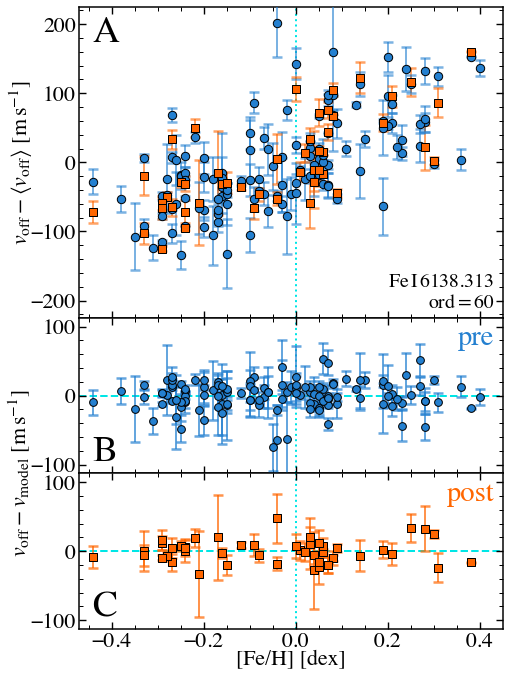

In [456]:
# Make the plot
name = i.split('_')
order = int(name[-1])
name = name[0][8:].replace('2','$\,$II$\,$').replace('1','$\,$I$\,$')+name[0][0:8]

fig = plt.figure(figsize=(6.0,9.0))

e, c, m = ['pre', 'post'], [myc['blue'], myc['orange']], ['o', 's']
FeH = [[stars['[Fe/H]'][stars['name']==star].values[0] for star in pre['star'].values],
       [stars['[Fe/H]'][stars['name']==star].values[0] for star in post['star'].values]]
dvr = [pre[i].values - np.nanmean(pre[i].values), post[i].values - np.nanmean(post[i].values)]
dvs = [preo['model_offset_transition'].values -
       np.nanmean(preo['model_offset_transition'].values),
       posto['model_offset_transition'].values -
       np.nanmean(posto['model_offset_transition'].values)]
edv = [pree[i].values, poste[i].values]
#edv = [preo['err_stat_transition'].values, posto['err_stat_transition'].values]

ax = {}

# Top panel
ax[2] = plt.subplot2grid((12,1),(0,0),rowspan=6,colspan=1)
xmin, xmax = -0.47, 0.45
xrng = xmax - xmin
ymin, ymax = -225, 225
yrng = ymax - ymin
ax[2].vlines([0.0],ymin,ymax,colors=myc['cyan'],linestyles=[':'],linewidths=2.0,zorder=1)
for j in range(0,2):
    ax[2].scatter(FeH[j],dvr[j],marker=m[j],s=70.0,c=c[j],edgecolors=myc['black'],
                alpha=1.0,zorder=101)
    ax[2].errorbar(FeH[j],dvr[j],yerr=edv[j],fmt='',ls='none',color=c[j],alpha=0.6,
                 elinewidth=2.0,capsize=5.0,mew=2.5,zorder=100)
ax[2].set_xlim(xmin,xmax)
ax[2].set_ylim(ymin,ymax)
ax[2].set_ylabel(r'$v_{\rm off} - \left<v_{\rm off}\right>$ [m$\,$s$^{-1}$]',
               labelpad=-5,fontsize=1.0*bfsize)
ax[2].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[2].yaxis.set_minor_locator(AutoMinorLocator(5))
ax[2].annotate(r'{:s}'.format(name)+'\n'+'ord$=${:d}'.format(order),xy=(0.98,0.02),
             xycoords='axes fraction',ha='right',va='bottom',fontsize=0.9*bfsize)
ax[2].annotate(r'A',xy=(0.03,0.97),xycoords='axes fraction',ha='left',va='top',
             fontsize=1.7*bfsize)

# Bottom panels
ymin, ymax = -112.5, 112.5
yrng = ymax - ymin
for j in [0, 1]:
    ax[j] = plt.subplot2grid((12,1),(6+j*3,0),rowspan=3,colspan=1)
    ax[j].hlines([0.0],xmin,xmax,colors=myc['cyan'],linestyles=['--'],linewidths=2.0,zorder=1)
    ax[j].vlines([0.0],ymin,ymax,colors=myc['cyan'],linestyles=[':'],linewidths=2.0,zorder=1)
    ax[j].scatter(FeH[j],dvs[j],marker=m[j],s=60.0,c=c[j],edgecolors=myc['black'],
                alpha=1.0,zorder=101)
    ax[j].errorbar(FeH[j],dvs[j],yerr=edv[j],fmt='',ls='none',color=c[j],alpha=0.7,
                elinewidth=2.0,capsize=5.0,mew=2.5,zorder=100)
    ax[j].set_xlim(xmin,xmax)
    ax[j].set_ylim(ymin,ymax)
    ax[j].xaxis.set_minor_locator(AutoMinorLocator(4))
    ax[j].yaxis.set_minor_locator(AutoMinorLocator(5))
    lab = 'B'
    epos = (0.98,0.95)
    if j == 1:
        lab = 'C'
        ax[j].set_xlabel(r'[Fe/H] [dex]',labelpad=-2,fontsize=1.0*bfsize)
        ax[j].annotate(r'$v_{\rm off} - v_{\rm model}$ [m$\,$s$^{-1}$]',
                       xy=(-0.14,1.0),xycoords='axes fraction',rotation=90,
                       ha='center',va='center',fontsize=1.0*bfsize)
    ax[j].annotate(e[j],xy=epos,xycoords='axes fraction',ha='right',va='top',
                   color=c[j],fontsize=1.3*bfsize)
    ax[j].annotate(lab,xy=(0.03,0.03),xycoords='axes fraction',ha='left',va='bottom',
                   fontsize=1.7*bfsize)


#plt.minorticks_on()
fig.subplots_adjust(left=0.01,right=0.99,bottom=0.02,top=0.98,wspace=0.0,hspace=0.0)

# Export to PDF
#plt.savefig('dvoff_vs_FeH_example.pdf',bbox_inches='tight',pad_inches=0.02)

# Example plot of pair separations and model offsets

In [426]:
# For each pair instance, load the model offsets first
inst = {}
for i in range(0,len(pairs)):
    globstr = 'pair_model_offsets/' + \
               pairs['lambda1'][i]+pairs['ion1'][i].replace('II','2').replace('I','1') + '_' + \
               pairs['lambda2'][i]+pairs['ion2'][i].replace('II','2').replace('I','1') + \
               '_*_pair_separations_*.csv'
    for file in glob(globstr):
        name = re.split('\/|_pair_separations',file)[1]
        if name not in inst: inst[name] = {}
        epoch = re.split('_|\/|\.csv',file)[-2]
        inst[name][epoch] = {}
        inst[name][epoch]['sigma_ss'] = np.nan
        df = pd.read_csv(file,comment='#')
        for j in range(0,len(df['star_name'])):
            if not np.isnan(df['model_offset_pair'][j]):
                if np.isnan(inst[name][epoch]['sigma_ss']):
                    inst[name][epoch]['sigma_ss'] = df['err_sys_pair'][j]
                star = df['star_name'][j]
                inst[name][epoch][star] = {}
                inst[name][epoch][star]['dvsep'] = df['model_offset_pair'][j]
                inst[name][epoch][star]['edvsep'] = df['err_stat_pair'][j]

In [427]:
# For each pair instance and fibre epoch, add in the pair separation measurements
# and stellar parameters each star
file = 'pair_separations/pair_separations_pre_17.csv'
pre = pd.read_csv(file,comment='#')
file = 'pair_separations/pair_separations_post_17.csv'
post = pd.read_csv(file,comment='#')
file = 'Stellar_sample_all.csv'
stars = pd.read_csv(file,comment='#')
for i in inst.keys():
    for epoch in inst[i].keys():
        for star in inst[i][epoch].keys() - {'sigma_ss'}:
            if epoch == 'pre':
                inst[i][epoch][star]['dvraw'] = pre[i][pre['star']==star].values[0]
            elif epoch == 'post':
                inst[i][epoch][star]['dvraw'] = post[i][post['star']==star].values[0]
            inst[i][epoch][star]['Teff'] = stars['T_eff'][stars['name']==star].values[0]
            inst[i][epoch][star]['FeH'] = stars['[Fe/H]'][stars['name']==star].values[0]
            inst[i][epoch][star]['logg'] = stars['logg'][stars['name']==star].values[0]

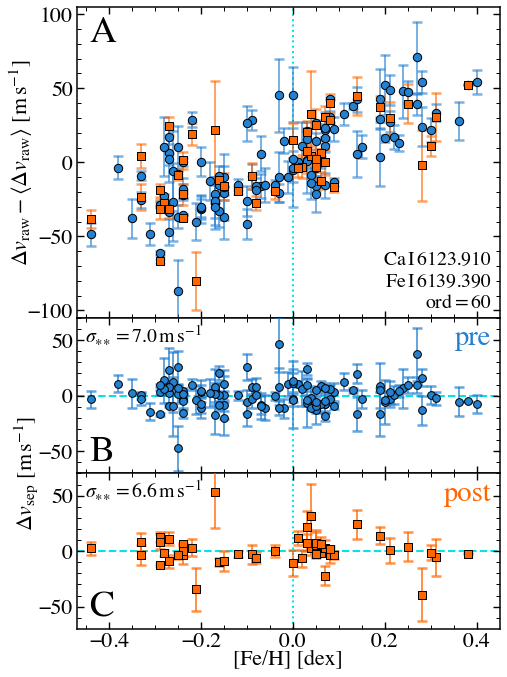

In [428]:
# Make the plot
i = '6123.910Ca1_6139.390Fe1_60'
name = i.split('_')
order = int(name[-1])
name = [name[j][8:].replace('2','$\,$II$\,$').replace('1','$\,$I$\,$')+name[j][0:8] for j in [0,1]]

fig = plt.figure(figsize=(6.0,9.0))

e, c, m = ['pre', 'post'], [myc['blue'], myc['orange']], ['o', 's']
FeH = [[inst[i][ep][s]['FeH'] for s in inst[i][ep].keys() - {'sigma_ss'}] for ep in e]
dvr = [[inst[i][ep][s]['dvraw'] for s in inst[i][ep].keys() - {'sigma_ss'}] for ep in e]
dvr = [dvr[j] - np.mean(dvr[j]) for j in [0,1]]
dvs = [[inst[i][ep][s]['dvsep'] for s in inst[i][ep].keys() - {'sigma_ss'}] for ep in e]
edv = [[inst[i][ep][s]['edvsep'] for s in inst[i][ep].keys() - {'sigma_ss'}] for ep in e]

ax = {}

# Top panel
ax[2] = plt.subplot2grid((12,1),(0,0),rowspan=6,colspan=1)
xmin, xmax = -0.47, 0.45
xrng = xmax - xmin
ymin, ymax = -105, 105
yrng = ymax - ymin
ax[2].vlines([0.0],ymin,ymax,colors=myc['cyan'],linestyles=[':'],linewidths=2.0,zorder=1)
for j in range(0,2):
    ax[2].scatter(FeH[j],dvr[j],marker=m[j],s=70.0,c=c[j],edgecolors=myc['black'],
                alpha=1.0,zorder=101)
    ax[2].errorbar(FeH[j],dvr[j],yerr=edv[j],fmt='',ls='none',color=c[j],alpha=0.6,
                 elinewidth=2.0,capsize=5.0,mew=2.5,zorder=100)
ax[2].set_xlim(xmin,xmax)
ax[2].set_ylim(ymin,ymax)
ax[2].set_ylabel(r'$\Delta v_{\rm raw} - \left<\Delta v_{\rm raw}\right>$ [m$\,$s$^{-1}$]',
               labelpad=-7,fontsize=1.0*bfsize)
ax[2].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[2].yaxis.set_minor_locator(AutoMinorLocator(5))
ax[2].annotate(r'{:s}'.format(name[0])+'\n'+r'{:s}'.format(name[1])+
             '\n'+'ord$=${:d}'.format(order),xy=(0.98,0.02),
             xycoords='axes fraction',ha='right',va='bottom',fontsize=0.9*bfsize)
ax[2].annotate(r'A',xy=(0.03,0.97),xycoords='axes fraction',ha='left',va='top',
             fontsize=1.7*bfsize)

# Bottom panels
for j in [0, 1]:
    ax[j] = plt.subplot2grid((12,1),(6+j*3,0),rowspan=3,colspan=1)
    ymin, ymax = -70, 70
    yrng = ymax - ymin
    ax[j].hlines([0.0],xmin,xmax,colors=myc['cyan'],linestyles=['--'],linewidths=2.0,zorder=1)
    ax[j].vlines([0.0],ymin,ymax,colors=myc['cyan'],linestyles=[':'],linewidths=2.0,zorder=1)
    ax[j].scatter(FeH[j],dvs[j],marker=m[j],s=60.0,c=c[j],edgecolors=myc['black'],
                alpha=1.0,zorder=101)
    ax[j].errorbar(FeH[j],dvs[j],yerr=edv[j],fmt='',ls='none',color=c[j],alpha=0.7,
                elinewidth=2.0,capsize=5.0,mew=2.5,zorder=100)
    ax[j].set_xlim(xmin,xmax)
    ax[j].set_ylim(ymin,ymax)
    ax[j].xaxis.set_minor_locator(AutoMinorLocator(4))
    ax[j].yaxis.set_minor_locator(AutoMinorLocator(5))
    ax[j].annotate(r'$\sigma_{\ast\!\ast}$'+r'$={:.1f}$'.format(inst[i][e[j]]['sigma_ss'])+\
                   '$\,$m$\,$s$^{-1}$',
                   xy=(0.02,0.97),xycoords='axes fraction',ha='left',va='top',
                   fontsize=0.9*bfsize)
    lab = 'B'
    epos = (0.98,0.95)
    if j == 1:
        lab = 'C'
        ax[j].set_xlabel(r'[Fe/H] [dex]',labelpad=-2,fontsize=1.0*bfsize)
        ax[j].annotate(r'$\Delta v_{\rm sep}$ [m$\,$s$^{-1}$]',
                       xy=(-0.12,1.0),xycoords='axes fraction',rotation=90,
                       ha='center',va='center',fontsize=1.0*bfsize)
    ax[j].annotate(e[j],xy=epos,xycoords='axes fraction',ha='right',va='top',
                   color=c[j],fontsize=1.3*bfsize)
    ax[j].annotate(lab,xy=(0.03,0.03),xycoords='axes fraction',ha='left',va='bottom',
                   fontsize=1.7*bfsize)

#plt.minorticks_on()
fig.subplots_adjust(left=0.01,right=0.99,bottom=0.02,top=0.98,wspace=0.0,hspace=0.0)

# Export to PDF
#plt.savefig('dvsep_vs_FeH_example.pdf',bbox_inches='tight',pad_inches=0.02)

# Pair separations for all 20 pair instances and all 3 stellar parameters

In [30]:
# Make the plot

# Loop over pair instances
for i in inst.keys():
    #i = '4652.593Cr1_4653.460Cr1_29'
    name = i.split('_')
    order = int(name[-1])
    name = [name[j][8:].replace('2','$\,$II$\,$').replace('1','$\,$I$\,$')+name[j][0:8] for j in [0,1]]

    fig = plt.figure(figsize=(9.0,4.0))

    e, c, m = ['pre', 'post'], [myc['blue'], myc['orange']], ['o', 's']
    Teff = [[inst[i][ep][s]['Teff'] for s in inst[i][ep].keys() - {'sigma_ss'}] for ep in e]
    FeH = [[inst[i][ep][s]['FeH'] for s in inst[i][ep].keys() - {'sigma_ss'}] for ep in e]
    logg = [[inst[i][ep][s]['logg'] for s in inst[i][ep].keys() - {'sigma_ss'}] for ep in e]
    dvr = [[inst[i][ep][s]['dvraw'] for s in inst[i][ep].keys() - {'sigma_ss'}] for ep in e]
    dvr = [dvr[j] - np.mean(dvr[j]) for j in [0,1]]
    dvs = [[inst[i][ep][s]['dvsep'] for s in inst[i][ep].keys() - {'sigma_ss'}] for ep in e]
    edv = [[inst[i][ep][s]['edvsep'] for s in inst[i][ep].keys() - {'sigma_ss'}] for ep in e]

    ax = {}
    xaxes = [Teff, FeH, logg]
    xaxlab = [r'$T_{\rm eff}$ [K]', '[Fe/H] [dex]', '$\log{g}$ [dex]']
    xaxlim = [(5360,6120), (-0.47, 0.45), (4.1,4.6)]
    solval = [Sun['Teff'], Sun['FeH'], Sun['logg']]

    for k in range(0,len(xaxes)):
        # Top panel
        n = 2 + 3*k
        ax[n] = plt.subplot2grid((12,3),(0,k),rowspan=6,colspan=1)
        plt.minorticks_on()
        ax[n].tick_params(axis='both',which='major',size=0.2*bfsize,labelsize=0.7*bfsize)
        ax[n].tick_params(axis='both',which='minor',size=0.1*bfsize)
        xmin, xmax = xaxlim[k][0], xaxlim[k][1]
        xrng = xmax - xmin
        ymin, ymax = -170, 170
        yrng = ymax - ymin
        ax[n].vlines([solval[k]],ymin,ymax,colors=myc['cyan'],linestyles=[':'],
                     linewidths=1.5,zorder=1)
        for j in range(0,2):
            ax[n].scatter(xaxes[k][j],dvr[j],marker=m[j],s=20.0,c=c[j],edgecolors=myc['black'],
                        alpha=1.0,zorder=101)#,rasterized=True)
            ax[n].errorbar(xaxes[k][j],dvr[j],yerr=edv[j],fmt='',ls='none',color=c[j],alpha=0.8,
                         elinewidth=1.5,capsize=3.0,mew=1.8,zorder=100)#,rasterized=True)
        ax[n].set_xlim(xmin,xmax)
        ax[n].set_ylim(ymin,ymax)
        ax[n].xaxis.set_ticklabels([])
        if k == 0:
            ax[n].set_ylabel(r'$\Delta v_{\rm raw} - \left<\Delta v_{\rm raw}\right>$ [m$\,$s$^{-1}$]',
                             labelpad=-7,fontsize=0.8*bfsize)
        else: ax[n].yaxis.set_ticklabels([])
        if k == 1:
            ax[n].annotate(r'{:s}, {:s}, ord$=${:d}'.format(name[0],name[1],order),
                           xy=(0.5,1.01),xycoords='axes fraction',ha='center',va='bottom',
                           fontsize=0.7*bfsize)
        # Bottom panels
        for j in [0, 1]:
            n = j + 3*k
            ax[n] = plt.subplot2grid((12,3),(6+3*j,k),rowspan=3,colspan=1)
            plt.minorticks_on()
            ax[n].tick_params(axis='both',which='major',size=0.2*bfsize,labelsize=0.7*bfsize)
            ax[n].tick_params(axis='both',which='minor',size=0.1*bfsize)
            ymin, ymax = -90, 90
            yrng = ymax - ymin
            ax[n].hlines([0.0],xmin,xmax,colors=myc['cyan'],linestyles=['--'],linewidths=1.5,zorder=1)
            ax[n].vlines([solval[k]],ymin,ymax,colors=myc['cyan'],linestyles=[':'],
                         linewidths=1.5,zorder=1)
            ax[n].scatter(xaxes[k][j],dvs[j],marker=m[j],s=15.0,c=c[j],edgecolors=myc['black'],
                        alpha=1.0,zorder=101)#,rasterized=True)
            ax[n].errorbar(xaxes[k][j],dvs[j],yerr=edv[j],fmt='',ls='none',color=c[j],alpha=0.8,
                        elinewidth=1.5,capsize=3.0,mew=1.8,zorder=100)#,rasterized=True)
            ax[n].set_xlim(xmin,xmax)
            ax[n].set_ylim(ymin,ymax)
            if k == 2:
                ax[n].annotate(r'$\sigma_{\ast\!\ast}$'+r'$={:.1f}$'.format(inst[i][e[j]]['sigma_ss'])+\
                               '$\,$m$\,$s$^{-1}$',xy=(0.03,0.03),xycoords='axes fraction',
                               ha='left',va='bottom',fontsize=0.6*bfsize)
            if k != 0: ax[n].yaxis.set_ticklabels([])
            if j == 1:
                ax[n].set_xlabel(xaxlab[k],labelpad=-2,fontsize=0.8*bfsize)
                if k == 0:
                    ax[n].annotate(r'$\Delta v_{\rm sep}$ [m$\,$s$^{-1}$]',
                                   xy=(-0.18,1.0),xycoords='axes fraction',rotation=90,
                                   ha='center',va='center',fontsize=0.8*bfsize)
            else: ax[n].xaxis.set_ticklabels([])
    fig.subplots_adjust(left=0.01,right=0.99,bottom=0.02,top=0.98,wspace=0.0,hspace=0.0)
    # Export to PDF
    #plt.savefig(i+'.pdf',bbox_inches='tight',pad_inches=0.02)
    # Export to PNG
    plt.savefig(i+'.png',dpi=200,bbox_inches='tight',pad_inches=0.02)
    plt.close()
    #break

# Plot example spectrum

In [429]:
# Read in spectrum and shift its wavelength array by vshift [km/s]
c = 299792.458 # Speed of light [km/s]
def rHARPS(filename, vshift):
    with fits.open(filename) as hdulist:
        f = hdulist['FLUX'].data
        e = hdulist['ERR'].data
        w = hdulist['BARY'].data # The wavelength scale corrected for barycentric velocity, in angstroms 
    w = w * (1 + vshift / c)
    return {'w':w, 'f':f, 'e':e}

In [430]:
# Read in a spectrum for each of two solar twins
filename = 'HARPS.2010-04-19T00:17:21.161_e2ds_A_HD76151.fits'
vshift = -(31.9 - 0.3925)
s1 = rHARPS(filename, vshift)
s1['sname'] = 'HD 76151'
s1['TiII4799.873+FeI4800.072'] = {}
s1['TiII4799.873+FeI4800.072']['vsep'] = 12.5185

filename = 'HARPS.2009-05-10T23:34:52.292_e2ds_A_HD78660.fits'
vshift = -(-12.3 - 0.6885)
s2 = rHARPS(filename, vshift)
s2['sname'] = 'HD 78660'
s2['TiII4799.873+FeI4800.072'] = {}
s2['TiII4799.873+FeI4800.072']['vsep'] = 12.5392

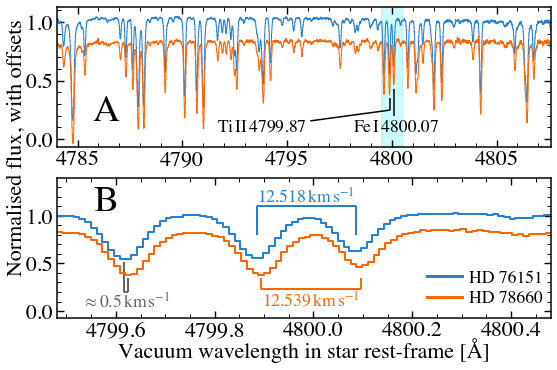

In [431]:
# Make the plot
fig = plt.figure(figsize=(7.0,4.5))

# Echelle order number to use
ord = 33
# Median filter the 10 pixels at the start and end of the order, and normalise by the line between them
norm1, norm2 = np.median(s1['f'][ord][0:10]), np.median(s1['f'][ord][-11:-1])
norm = norm1 + (s1['w'][ord] - s1['w'][ord][0])/(s1['w'][ord][-1] - s1['w'][ord][0]) * (norm2 - norm1)
s1['fn'] = s1['f'] / norm
norm1, norm2 = np.median(s2['f'][ord][0:10]), np.median(s2['f'][ord][-11:-1])
norm = norm1 + (s2['w'][ord] - s2['w'][ord][0])/(s2['w'][ord][-1] - s2['w'][ord][0]) * (norm2 - norm1)
s2['fn'] = s2['f'] / norm

# Top panel: Wide wavelength range
ax1 = plt.subplot2grid((100,1),(0,0),rowspan=45,colspan=1)
ax1.yaxis.set_ticks([0,0.5,1])
xmin, xmax = 4784.0, s1['w'][ord][-1]
xrng = xmax - xmin
ymin, ymax = 0.0, np.max(s1['fn'][ord])
yrng = ymax - ymin
ymin = ymin - 0.06 * yrng
ymax = ymax + 0.06 * yrng
yrng = ymax - ymin
#ax1.hlines([0.0],xmin,xmax,colors=myc['cyan'],linestyles='dashed',linewidths=1.5,zorder=0)
ax1.fill_betweenx([ymin,ymax],4799.48,4800.48,color=myc['cyan'],alpha=0.2)
ax1.step(s1['w'][ord],s1['fn'][ord],where='mid',lw=1.0,color=myc['blue'],alpha=1.0,
         label=r'{:s}, single echelle order'.format(s1['sname']))
ax1.step(s2['w'][ord],s2['fn'][ord]-0.2,where='mid',lw=1.0,color=myc['orange'],alpha=1.0)
c1, dv1 = 4800.0, 12.52
ax1.vlines([c1*(1-0.5*dv1/c)],0.35,0.25,colors='black',linestyles='solid',linewidths=1.5)
ax1.annotate(r'Ti$\,$II$\,$4799.87',xy=(c1*(1-0.5*dv1/c)+0.1,0.25),xytext=(4793.8,0.10),fontsize=0.8*bfsize,
             va='center',ha='center',arrowprops={'arrowstyle':'-','linewidth':1.5,'connectionstyle':'arc3'})
ax1.vlines([c1*(1+0.5*dv1/c)],0.43,0.20,colors='black',linestyles='solid',linewidths=1.5)
ax1.annotate(r'Fe$\,$I$\,$4800.07',xy=(c1*(1+0.5*dv1/c)+0.1,0.10),va='center',ha='center',fontsize=0.8*bfsize)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
handles1,labels1=ax1.get_legend_handles_labels()
ax1.annotate(r'Normalised flux, with offsets',xy=(-0.08,0.0),xycoords='axes fraction',
             ha='center',va='center',rotation=90,fontsize=1.0*bfsize)
ax1.annotate(r'A',xy=(0.10,0.25),xycoords='axes fraction',ha='center',va='center',fontsize=1.7*bfsize)

# Bottom panel: Narrow wavelength range
ax2 = plt.subplot2grid((100,1),(55,0),rowspan=45,colspan=1)
ax2.yaxis.set_ticks([0,0.5,1])
xmin, xmax = 4799.48, 4800.48
xrng = xmax - xmin
ymax = 1.4
ymin = -0.05 * ymax
yrng = ymax - ymin
#ax2.hlines([0.0],xmin,xmax,colors=myc['cyan'],linestyles='dashed',linewidths=1.5,zorder=0)
ax2.step(s1['w'][ord],s1['fn'][ord],where='mid',lw=2.0,color=myc['blue'],alpha=1.0,
         label=r'{:s}'.format(s1['sname']))
c1, dv1 = 4799.985, s1['TiII4799.873+FeI4800.072']['vsep']
ax2.vlines([c1*(1-0.5*dv1/c),c1*(1+0.5*dv1/c)],0.80,1.1,colors=myc['blue'],linestyles='solid',linewidths=2.0)
ax2.hlines(1.1,c1*(1-0.5*dv1/c),c1*(1+0.5*dv1/c),colors=myc['blue'],linestyles='solid',linewidths=2.0)
ax2.annotate(r'${:.3f}\,$km$\,$s'.format(dv1)+r'$^{-1}$',xy=(c1,1.2),xycoords='data',ha='center',
             va='center',color=myc['blue'],fontsize=0.8*bfsize)
ax2.step(s2['w'][ord],s2['fn'][ord]-0.20,where='mid',lw=2.0,color=myc['orange'],alpha=1.0,
         label=r'{:s}'.format(s2['sname']))
c2, dv2 = 4799.995, s2['TiII4799.873+FeI4800.072']['vsep']
ax2.vlines([c2*(1-0.5*dv2/c),c2*(1+0.5*dv2/c)],0.35,0.23,colors=myc['orange'],linestyles='solid',linewidths=2.0)
ax2.hlines(0.23,c2*(1-0.5*dv2/c),c2*(1+0.5*dv2/c),colors=myc['orange'],linestyles='solid',linewidths=2.0)
ax2.annotate(r'${:.3f}\,$km$\,$s'.format(dv2)+r'$^{-1}$',xy=(c2,0.12),xycoords='data',ha='center',
             va='center',color=myc['orange'],fontsize=0.8*bfsize)
c3, dv3 = 4799.621, 0.5
ax2.vlines([c3*(1-0.5*dv3/c)],0.51,0.20,colors=myc['dgrey'],linestyles='solid',linewidths=2.0)
ax2.vlines([c3*(1+0.5*dv3/c)],0.35,0.20,colors=myc['dgrey'],linestyles='solid',linewidths=2.0)
ax2.hlines(0.20,c3*(1-0.5*dv3/c),c3*(1+0.5*dv3/c),colors=myc['dgrey'],linestyles='solid',linewidths=2.0)
ax2.annotate(r'$\approx 0.5\,$km$\,$s'+r'$^{-1}$',xy=(c3,0.10),xycoords='data',ha='center',
             va='center',color=myc['dgrey'],fontsize=0.8*bfsize)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)
ax2.xaxis.set_major_locator(MultipleLocator(0.2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))
ax2.ticklabel_format(useOffset=False)
ax2.set_xlabel(r'Vacuum wavelength in star rest-frame [Å]',ha='center',labelpad=-3,fontsize=bfsize)
#ax2.set_ylabel(r'Flux [Arbitrary]',ha='center',va='bottom',labelpad=5,fontsize=bfsize)
handles2,labels2=ax2.get_legend_handles_labels()
leg=ax2.legend(handles2,labels2,bbox_to_anchor=(0.72,0.45),fontsize=0.8*bfsize)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)
ax2.annotate(r'B',xy=(0.10,0.83),xycoords='axes fraction',ha='center',va='center',fontsize=1.7*bfsize)


fig.subplots_adjust(left=0.01,right=0.99,bottom=0.02,top=0.98,wspace=0.0,hspace=0.0)

# Export to PDF
#plt.savefig('spec_pair_example.pdf',bbox_inches='tight',pad_inches=0.02)

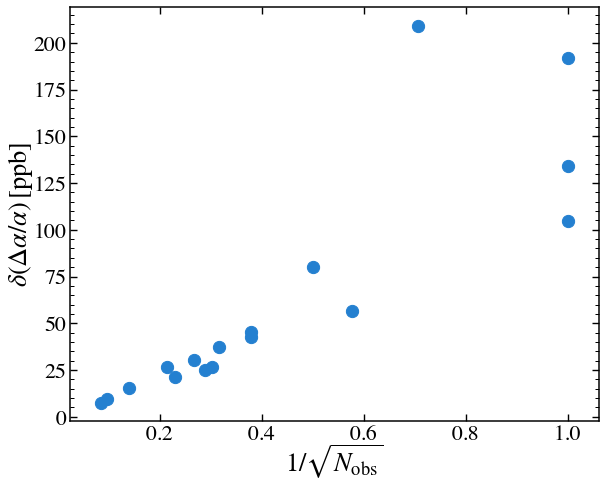

In [26]:
fig = plt.figure(figsize=(7.5,6.0))
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)

eda, Nobs = df_s.loc['emda_stat'], list(df_s.loc['Nobs'])

#xmin, xmax = -250.0,250.0
#xrng = xmax - xmin
#ymin, ymax = 0, y[0] + 2.5
#yrng = ymax - ymin

#ax1.vlines([0.0],ymin,ymax-2.0,colors=myc['cyan'],linestyles=[':'],linewidths=2.0,zorder=1)
ax1.scatter(1/np.sqrt(Nobs),eda,marker='o',s=150.0,c=myc['blue'],alpha=1.0,zorder=101)
#ax1.set_xlim(xmin,xmax)
#ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'$1/\sqrt{N_\mathrm{{obs}}}$',labelpad=-2,fontsize=1.2*bfsize)
ax1.set_ylabel(r'$\delta(\Delta\alpha/\alpha)\,$[ppb]',labelpad=-2,fontsize=1.2*bfsize)
#ax1.xaxis.set_major_locator(MultipleLocator(100))
#ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
#ax1.yaxis.set_major_locator(MultipleLocator(100))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

#plt.minorticks_on()
fig.subplots_adjust(left=0.01,right=0.99,bottom=0.02,top=0.98,wspace=0.0,hspace=0.0)

# Export to PDF
#plt.savefig('da_stars.pdf',bbox_inches='tight',pad_inches=0.02)

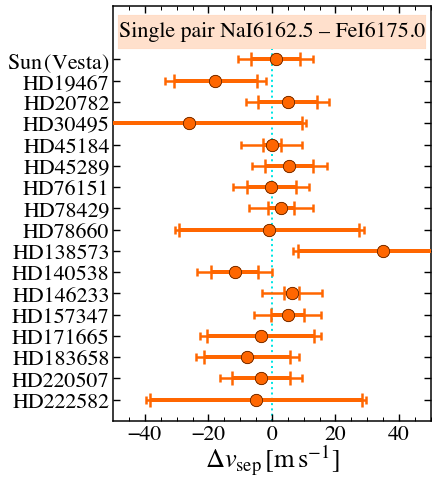

In [27]:
fig = plt.figure(figsize=(4.5,6.0))

dv, edv, edv_stat = [], [], []
pname = 'NaI6162.452_FeI6175.044'
for sname in snames:
    filt = (df_sp['sname'] == sname) & (df_sp['pname'] == pname)
    dv.append(df_sp['dv'][filt].values[0])
    edv.append(np.sqrt(np.square(df_sp['edv_stat'][filt].values[0]) + 
                       np.square(df_sp['edv_s2s'][filt].values[0])))
    edv_stat.append(df_sp['edv_stat'][filt].values[0])
x = np.array(dv)
ex = np.array(edv)
ex_stat = np.array(edv_stat)

y = np.arange(len(snames),0,-1)
xmin, xmax = -50.0,50.0
xrng = xmax - xmin
ymin, ymax = 0, y[0] + 2.5
yrng = ymax - ymin

ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)

plt.yticks(y,[re.sub('Vesta','Sun$\,$(Vesta)',sname) for sname in snames],rotation=0)

ax1.vlines([0.0],ymin,ymax-2.0,colors=myc['cyan'],linestyles=[':'],linewidths=2.0,zorder=1)
ax1.fill_between([xmin+0.015*xrng,xmax-0.015*xrng],[ymax-0.4]*2,[ymax-2.0]*2,lw=0.2,facecolor=myc['orange'],
                 edgecolor=myc['orange'],alpha=0.20,zorder=1)
ax1.errorbar(x,y,xerr=ex_stat,fmt='',ls='none',color=myc['orange'],alpha=1.0,elinewidth=4.0,
             capsize=7.0,mew=2.5,zorder=100)
ax1.errorbar(x,y,xerr=ex,fmt='',ls='none',color=myc['orange'],alpha=1.0,elinewidth=2.5,
             capsize=4.0,mew=2.5,zorder=100)
ax1.scatter(x,y,marker='o',s=150.0,c=myc['orange'],alpha=1.0,zorder=101)
ax1.scatter(x,y,marker='o',s=150.0,facecolors=myc['orange'],edgecolors='black',linewidths=0.5,alpha=1.0,zorder=102)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'$\Delta v_\mathrm{{sep}}\,$[m$\,$s$^{-1}$]',labelpad=-2,fontsize=1.2*bfsize)
annot = r'Single pair NaI6162.5 – FeI6175.0'
ax1.annotate(annot,xy=(0.5,0.965),xycoords='axes fraction',ha='center',va='top',
             fontsize=1.0*bfsize)

ax1.xaxis.set_major_locator(MultipleLocator(20))
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
#plt.minorticks_on()
fig.subplots_adjust(left=0.01,right=0.99,bottom=0.02,top=0.98,wspace=0.0,hspace=0.0)

# Export to PDF
plt.savefig('dv_NaI6162.5-FeI6175.0.pdf',bbox_inches='tight',pad_inches=0.02)